In [1]:
import skimage as ski
print(ski.__version__)

0.22.0


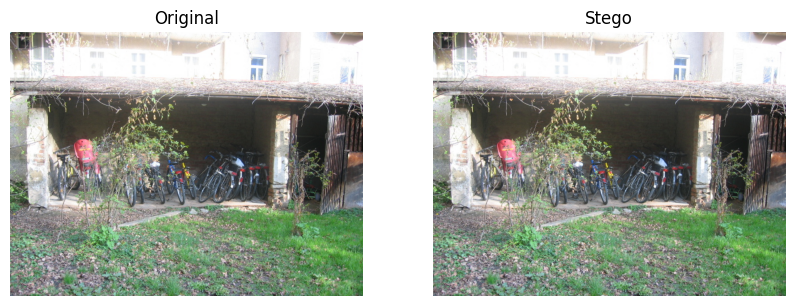

In [2]:
import skimage.metrics as sm
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

original = imread('../original_images_BMP/bike/bike_001.bmp')
stego = imread('../steghide_images/bike/bike_001.bmp')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original)
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(stego)
axs[1].axis('off')
axs[1].set_title('Stego')

plt.show()


In [3]:
psnrValue = sm.peak_signal_noise_ratio(original.astype(np.int32), stego.astype(np.int32), data_range=255)
print(f'PSNR: {psnrValue} dB')

PSNR: 70.77871795257533 dB


In [4]:
minDimension = min(original.shape[:2])
windowSize = min(7, minDimension - (minDimension % 2 - 1))  # ensure odd window size


ssiValue = sm.structural_similarity(original.astype(np.int32), stego.astype(np.int32), data_range=255, win_size=windowSize, channel_axis=-1)    # Due to bmp typically stored in 8-bit unsigned integer format
print(f'Structural Similarity Index: {ssiValue}')

Structural Similarity Index: 0.9999743382883315


In [5]:
# # Build an excel files then
# import openpyxl
# from openpyxl.drawing.image import Image
# import glob
# 
# ORIGNAL_IMAGE_PATH = '../original_images_BMP/bike'
# STEGO_IMAGE_PATH = '../steghide_images/bike'
# 
# workbook = openpyxl.Workbook()
# sheet = workbook.active
# sheet.title = 'Bike'
# 
# image_files = glob.glob(f'{ORIGNAL_IMAGE_PATH}/*.bmp')
# stego_files = glob.glob(f'{STEGO_IMAGE_PATH}/*.bmp')
# 
# 
# 
# # Sort the image files based on the number after the last underscore
# image_files = sorted(image_files, key=get_number)
# stego_files = sorted(stego_files, key=get_number)
# 
# sheet.append(['Original Image', 'Stego Image', 'PSNR', 'SSI'])
# if len(image_files) != len(stego_files):
#     print('Number of images are not equal')
#     exit(1)
# 
# for index in range(len(image_files)):
#     original_image = imread(image_files[index])
#     stego_image = imread(stego_files[index])
#     psnrValue = sm.peak_signal_noise_ratio(original_image.astype(np.int32), stego_image.astype(np.int32), data_range=255)
# 
#     # Calculate the SSIM
#     minDimension = min(original_image.shape[:2])
#     windowSize = min(7, minDimension - (minDimension % 2 - 1))  # ensure odd window size
#     ssiValue = sm.structural_similarity(original_image.astype(np.int32), stego_image.astype(np.int32), data_range=255, win_size=windowSize, channel_axis=-1)
# 
#     # Put in the cell of the excel file
#     sheet.cell(row=index + 2, column=1).value = image_files[index]
#     sheet.cell(row=index + 2, column=1).hyperlink = f'{image_files[index]}'
#     sheet.cell(row=index + 2, column=1).style = 'Hyperlink'
#     sheet.cell(row=index + 2, column=2).value = stego_files[index]
#     sheet.cell(row=index + 2, column=2).hyperlink = f'{stego_files[index]}'
#     sheet.cell(row=index + 2, column=2).style = 'Hyperlink'
#     sheet.cell(row=index + 2, column=3).value = psnrValue
#     sheet.cell(row=index + 2, column=4).value = ssiValue
#     
# workbook.save('bike_001.xlsx')

In [12]:
# Build an excel files then
import openpyxl
from openpyxl.drawing.image import Image
import glob

ORIGINAL_IMAGE = '../original_images_BMP'
STEGO_IMAGE_PATH = '../steghide_images'

# Define a custom key function to extract the number after the last underscore
def get_number(fullFileName: str):
    filename = fullFileName.split('/')[-1]
    if '-' in filename:
        return int(filename.split('-')[-1].split('.')[0])
    elif '_' in filename:
        return int(filename.split('_')[-1].split('.')[0])
    periodCount = filename.count('.')
    if periodCount == 1:
        return int(filename.split('.')[0])
    elif periodCount == 2:
        return int(filename.split('.')[-2])
    
    raise ValueError(f'Cannot extract number from {filename}')

fullFolderNames = glob.glob(f'{ORIGINAL_IMAGE}/*')
folderNames = [folder.split('/')[-1] for folder in fullFolderNames]
workbook = openpyxl.Workbook()

for folder in folderNames:
    image_files = glob.glob(f'{ORIGINAL_IMAGE}/{folder}/*.bmp')
    stego_files = glob.glob(f'{STEGO_IMAGE_PATH}/{folder}/*.bmp')

    if len(image_files) != len(stego_files):
        print(f'Number of images in {folder} are not equal')
        continue
    
    sheet = workbook.create_sheet(folder)
    sheet.append(['Original Image', 'Stego Image', 'PSNR', 'SSI'])
    image_files = sorted(image_files, key=get_number)
    stego_files = sorted(stego_files, key=get_number)
    for index in range(len(image_files)):
        original_image = imread(image_files[index])
        stego_image = imread(stego_files[index])
        psnrValue = sm.peak_signal_noise_ratio(original_image.astype(np.int32), stego_image.astype(np.int32), data_range=255)

        # Calculate the SSIM
        minDimension = min(original_image.shape[:2])
        windowSize = min(7, minDimension - (minDimension % 2 - 1))
        ssiValue = sm.structural_similarity(original_image.astype(np.int32), stego_image.astype(np.int32), data_range=255, win_size=windowSize, channel_axis=-1)

        # Put in the cell of the excel file
        sheet.cell(row=index + 2, column=1).value = image_files[index]
        sheet.cell(row=index + 2, column=1).hyperlink = f'{image_files[index]}'
        sheet.cell(row=index + 2, column=1).style = 'Hyperlink'
        sheet.cell(row=index + 2, column=2).value = stego_files[index]
        sheet.cell(row=index + 2, column=2).hyperlink = f'{stego_files[index]}'
        sheet.cell(row=index + 2, column=2).style = 'Hyperlink'
        sheet.cell(row=index + 2, column=3).value = psnrValue
        sheet.cell(row=index + 2, column=4).value = ssiValue

workbook.save('metrics.xlsx')

Number of images in flowers are not equal
